In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-email/spam.csv


In [64]:
#libraries for calculations and plots
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
#importing libraries for models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [66]:
#libraries for language processing
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [126]:
mail = pd.read_csv('/kaggle/input/spam-email/spam.csv')
mail.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [69]:
mail.isnull().sum()

Category    0
Message     0
dtype: int64

In [70]:
mail.duplicated().sum()

415

In [71]:
mail.drop_duplicates( keep = 'first', inplace = True)

In [72]:
mail.size

10314

In [73]:
mail.shape

(5157, 2)

In [74]:
mail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5157 non-null   object
 1   Message   5157 non-null   object
dtypes: object(2)
memory usage: 120.9+ KB


In [75]:
mail.describe()

,Category,Message
count,5157,5157
unique,2,5157
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [77]:
mail.columns = mail.columns.str.strip()
mail.columns = mail.columns.str.lower()

In [79]:
mail.dtypes

category    object
message     object
dtype: object

In [80]:
mail['category'].value_counts().to_frame()

,count
category,
ham,4516
spam,641


In [81]:
mail.loc[mail['category'] == 'spam','category'] = 1
mail.loc[mail['category'] == 'ham', 'category'] = 0

In [82]:
mail['category'] = mail['category'].astype('int64')

In [83]:
mail.describe()

,category
count,5157.000000
mean,0.124297
std,0.329952
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


<Axes: xlabel='category', ylabel='count'>

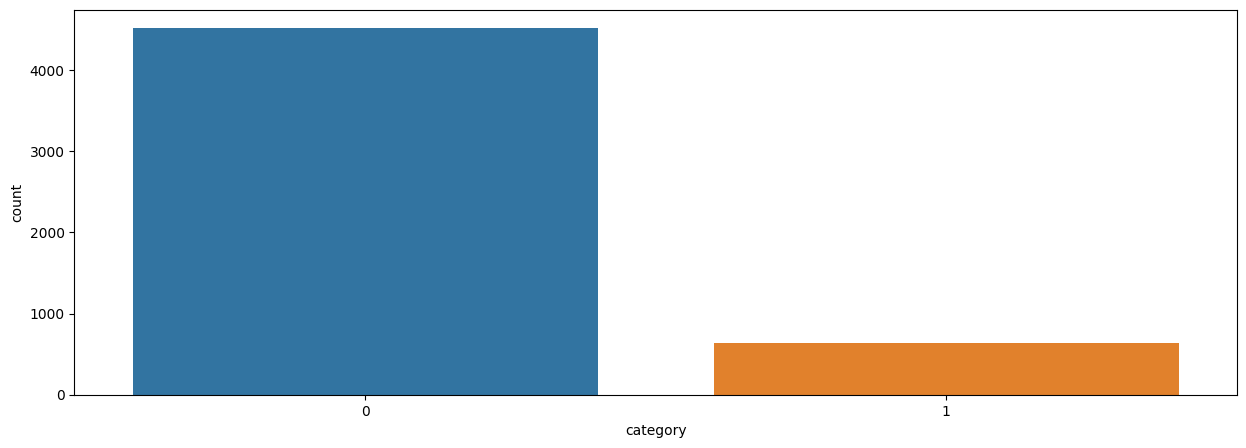

In [84]:
plt.figure(figsize= (15,5))
sns.countplot(data = mail, x= 'category')

In [86]:
#data preprocessing

mail.head()

,category,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [87]:
X = mail['message']
y = mail['category']

In [88]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5157, dtype: object

In [89]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: category, Length: 5157, dtype: int64

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [91]:
print(X_train.shape)
print(X_test.shape)

(4125,)
(1032,)


In [92]:
#feature extraction
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [93]:
fe = TfidfVectorizer(min_df =1, stop_words = 'english', lowercase = True)

In [94]:
X_test.dtypes

dtype('O')

In [95]:
X_train_fe = fe.fit_transform(X_train)
X_test_fe  = fe.transform(X_test)

In [96]:
print(X_train.head())

3734                Old Orchard near univ. How about you?
3720    Thanks for your ringtone order, reference numb...
681        What is this 'hex' place you talk of? Explain!
4165                  Its ok, called mom instead have fun
3057                             Webpage s not available!
Name: message, dtype: object


In [97]:
print(X_train_fe)

  (0, 6818)	0.5739788188946062
  (0, 4485)	0.4906764134643631
  (0, 4728)	0.4817972507769212
  (0, 4681)	0.44458562940552054
  (1, 6760)	0.2835428015076369
  (1, 6471)	0.14542627512844372
  (1, 5367)	0.24745538040851425
  (1, 1813)	0.4392463649249198
  (1, 214)	0.27022400810961306
  (1, 5742)	0.2196231824624599
  (1, 2030)	0.18952469382234666
  (1, 1020)	0.23800554610543917
  (1, 6624)	0.20630438906443613
  (1, 517)	0.18432732222631074
  (1, 1641)	0.2275449186265733
  (1, 4318)	0.15707243591111456
  (1, 7269)	0.27022400810961306
  (1, 4614)	0.16583070390719393
  (1, 5372)	0.24239181016355874
  (1, 4729)	0.20959194915388416
  (1, 5509)	0.21324550953423102
  (1, 6487)	0.16969966300214262
  (2, 2584)	0.5479285984863099
  (2, 6384)	0.4097389232754499
  (2, 4956)	0.39512024803714585
  :	:
  (4121, 1468)	0.17565732524995498
  (4121, 254)	0.19582685756101897
  (4121, 6289)	0.15915727832638799
  (4121, 5624)	0.14535496815743226
  (4121, 3898)	0.1410148881186621
  (4121, 247)	0.1402343416050663

In [112]:
#model_selection

modelNB = MultinomialNB()
modelNB.fit(X_train_fe, y_train)

#modelLR = LogisticRegression()
#modelLR.fit(X_train_fe, y_train)

MultinomialNB()

In [113]:
#model_evaluation
pre_model_train = modelNB.predict(X_train_fe)
pre_model_test = modelNB.predict(X_test_fe)

In [100]:
from sklearn.metrics import mean_absolute_error

In [101]:
X_test_fe.toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [114]:
acc_score = accuracy_score(y_train, pre_model_train)
acc_score

0.9779393939393939

In [115]:
acc_score2 = accuracy_score(y_test, pre_model_test)
acc_score2

0.9622093023255814

In [116]:
X_train.describe()

count                                      4125
unique                                     4125
top       Old Orchard near univ. How about you?
freq                                          1
Name: message, dtype: object

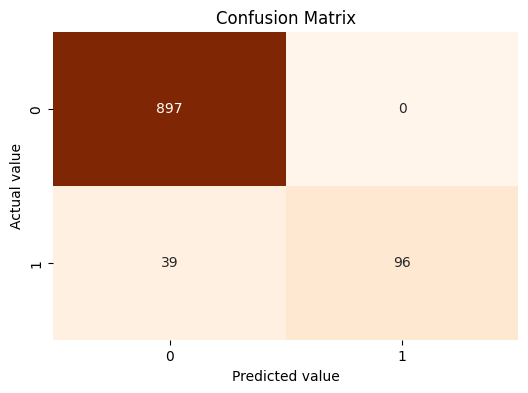

In [125]:
conf_matrix=confusion_matrix(y_test,pre_model_test)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

In [123]:
#testing with a random example
ex = ["Hurry up!!Free entry in 2 a wkly comp to win FA Cup fina...","I'm always looking for an excuse to be in the ...","URGENT! Your mobile was awarded a £1,500 Bonus...","Want explicit SEX in 30 secs? Ring 02073162414..."]
new_ex = fe.transform(ex)
pre_new_ex = modelNB.predict(new_ex)
print(pre_new_ex)

for i in range(len(ex)):
    if(pre_new_ex[i] == 1):
        print("This is a Spam mail.")
        
    else:
        print("Yeah! it's a Ham")

[1 0 1 0]
This is a Spam mail.
Yeah! it's a Ham
This is a Spam mail.
Yeah! it's a Ham


In [119]:
X_test.tail(30)

2807                                           Can a not?
1551    He says hi and to get your ass back to south t...
3261    I'm always looking for an excuse to be in the ...
1618                        Did u download the fring app?
2457                            Onum ela pa. Normal than.
3692    Sir, i am waiting for your call, once free ple...
1755    How is your schedule next week? I am out of to...
3812          Excellent! Wish we were together right now!
5114              Argh why the fuck is nobody in town ;_;
4752    Your weekly Cool-Mob tones are ready to downlo...
4306                Yo come over carlos will be here soon
4347             You still around? I could use a half-8th
3034                          Aight, lemme know what's up
548                      Sorry that took so long, omw now
2954    URGENT! Your mobile was awarded a £1,500 Bonus...
624     sorry, no, have got few things to do. may be i...
220     Yeah you should. I think you can use your gt a...
2665          

In [ ]:
# Data visualization - Top 7 Most Common Words in Spam Emails

stop_words = set(stopwords.words('english'))
spam_words = " ".join(df[df['Category'] == 0]['Message']).split()
ham_words = " ".join(df[df['Category'] == 1]['Message']).split()

spam_word_freq = Counter([word.lower() for word in spam_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*spam_word_freq.most_common(7)), color='y')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 7 Most Common Words in Spam Emails')
plt.xticks(rotation=45)
plt.show()